# social-media-ads_in_KNN

### import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### reading file

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.isna().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

### check balacing of outcomes

<AxesSubplot:xlabel='Purchased', ylabel='count'>

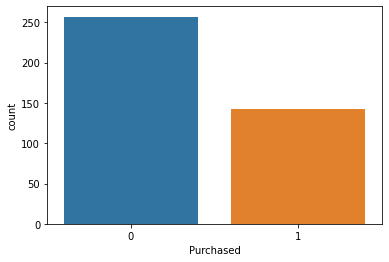

In [10]:
sns.countplot(x = "Purchased" ,data = df )

its looks like unbalance in data

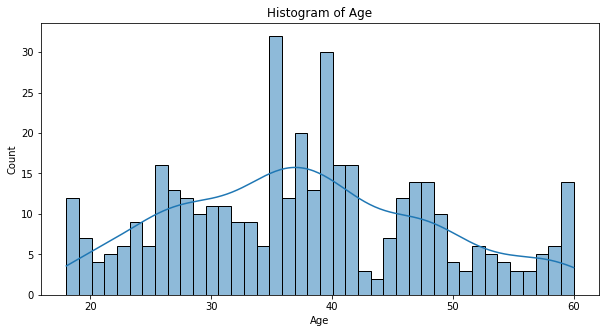

In [11]:
plt.figure(figsize=(10,5))
plt.title('Histogram of Age')
sns.histplot(data=df,x='Age',bins=40, kde=True);

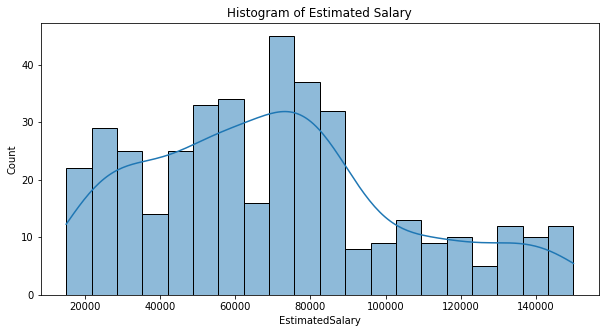

In [12]:
plt.figure(figsize=(10,5))
plt.title('Histogram of Estimated Salary')
sns.histplot(data=df,x='EstimatedSalary',bins=20, kde=True);

<AxesSubplot:title={'center':'Heat map of Correlation'}>

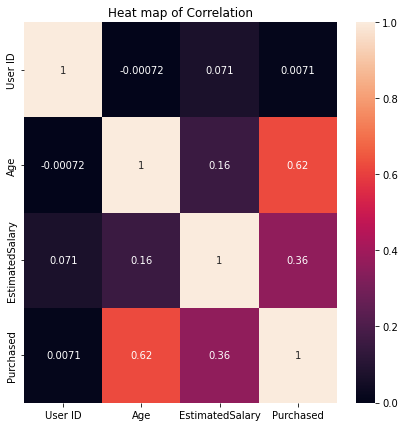

In [15]:
plt.figure(figsize=(7,7))
plt.title('Heat map of Correlation')
sns.heatmap(data=df.corr(), annot= True)

### COnverting Categorical data to Num using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
dfle = df 
dfle.Gender = le.fit_transform(dfle.Gender)
dfle

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


### Split data as X & Y

In [18]:
X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,4].values

In [19]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Splitting the dataset into the Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 10)

In [26]:
X_train

array([[     1,     28,  79000],
       [     0,     28,  85000],
       [     0,     41,  72000],
       [     1,     60,  34000],
       [     0,     46,  82000],
       [     1,     47,  34000],
       [     0,     33,  69000],
       [     1,     26,  15000],
       [     1,     36, 144000],
       [     1,     35,  38000],
       [     1,     31,  18000],
       [     0,     52, 114000],
       [     1,     34,  43000],
       [     1,     25,  80000],
       [     1,     53,  72000],
       [     1,     45,  26000],
       [     1,     37,  53000],
       [     1,     60, 102000],
       [     0,     32, 117000],
       [     1,     42,  80000],
       [     0,     49,  36000],
       [     1,     47,  20000],
       [     0,     50,  36000],
       [     0,     35,  77000],
       [     1,     31,  58000],
       [     1,     42,  64000],
       [     1,     43, 129000],
       [     1,     45,  22000],
       [     1,     29,  43000],
       [     0,     58,  95000],
       [  

In [23]:
X_test

array([[     1,     42,  65000],
       [     0,     37,  71000],
       [     0,     42,  90000],
       [     0,     47,  47000],
       [     0,     23,  48000],
       [     0,     58,  23000],
       [     1,     39,  42000],
       [     1,     47,  43000],
       [     1,     35,  59000],
       [     0,     39,  71000],
       [     1,     41,  59000],
       [     0,     26, 118000],
       [     1,     59, 130000],
       [     0,     57,  26000],
       [     1,     46,  23000],
       [     1,     38,  71000],
       [     0,     28,  87000],
       [     1,     24,  58000],
       [     1,     30,  15000],
       [     1,     39, 122000],
       [     0,     27,  54000],
       [     1,     21,  72000],
       [     1,     37,  75000],
       [     0,     59,  88000],
       [     0,     58,  47000],
       [     1,     37,  55000],
       [     1,     38,  59000],
       [     0,     37, 146000],
       [     1,     48,  33000],
       [     1,     36,  33000],
       [  